<a href="https://colab.research.google.com/github/abdelhadi-12/Machine-Learning-/blob/main/dso5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0- IMPORT & LOAD DATA**

In [ ]:
import pandas as pd
import json

# Load CRM visits dataset
with open("vital_bo6_datasetProduit.json") as f:
    crm_data = json.load(f)

df_crm = pd.DataFrame(crm_data)

# Load CRM structured dataset
with open("crm_dataset.json") as f:
    crm_struct = json.load(f)

# Extract products table
df_products = pd.DataFrame(crm_struct["data"]["products"])

print("CRM dataset shape:", df_crm.shape)
print("Products dataset shape:", df_products.shape)

df_crm.head()

CRM dataset shape: (300, 19)
Products dataset shape: (30, 7)


,visit_id,rep_id,doctor_id,date,region,channel,doctor_specialty,doctor_persona,language,product_name,product_category,product_description,main_objection_type,sentiment_score,engagement_score,interest_level,transcript,turns_json,crm_report_json
0,7f59b863-b8b7-4ac4-9a05-0612167f00e5,REP-754,HCP-2824,2025-12-14,Tunis,Hospital,Pediatrician,Busy,FR,Vitonic Zinc Vit.D3 30 Gélules,Compléments Alimentaires | Confort | Zinc,Vitonic Zinc Vit.D3 est un complément alimenta...,STOCK_AVAILABILITY,0.30,63,58,"REP: Bonjour docteur, 2 minutes ?\nDOCTOR: Oui...","[{""speaker"": ""REP"", ""text"": ""Bonjour docteur, ...","{""summary"": ""Promotion of Vitonic Zinc Vit.D3 ..."
1,66739e45-7340-4306-8c30-ac331289dcca,REP-303,HCP-9928,2026-01-06,Monastir,Private Practice,Cardiologist,Economic-focused,AR,Pédiakids Creme Pour Le Change 40 Gr,Bébé et Maman | Change de bébé | Crème de change,Pédiakids Crème pour le change est une formule...,CNAM_REIMBURSEMENT,0.15,69,51,"REP: Bonjour docteur, 2 minutes ?\nDOCTOR: Oui...","[{""speaker"": ""REP"", ""text"": ""Bonjour docteur, ...","{""summary"": ""Promotion of Pédiakids Creme Pour..."
2,8490822a-e79e-4899-b931-4e308e5395ad,REP-199,HCP-6881,2025-11-25,Nabeul,Clinic,Pulmonologist,Busy,FR,Vital Phytoveine Gel 90 Gr,Corps | Jambes lourdes,"VITAL PHYTOVEINE Gel, 90 gr pour les Jambes lo...",ASK_EFFICACY,-0.29,25,32,"REP: Bonjour docteur, 2 minutes ?\nDOCTOR: Oui...","[{""speaker"": ""REP"", ""text"": ""Bonjour docteur, ...","{""summary"": ""Promotion of Vital Phytoveine Gel..."
3,35878803-9a92-4b93-9f5c-92d6843a0de0,REP-171,HCP-1750,2025-11-26,Sfax,Clinic,Pharmacist,Busy,EN,Phytothera Levure De Riz Rouge 60 Gélules,Compléments Alimentaires | Minceur | Brule gra...,LEVURE DE RIZ ROUGE est un complément alimenta...,ASK_EFFICACY,0.57,60,31,"REP: Bonjour docteur, 2 minutes ?\nDOCTOR: Oui...","[{""speaker"": ""REP"", ""text"": ""Bonjour docteur, ...","{""summary"": ""Promotion of Phytothera Levure De..."
4,d3d711e2-a6f3-41da-a348-7b67cf5d8c3c,REP-799,HCP-2169,2026-01-14,Ben Arous,Hospital,Pulmonologist,Skeptical,FR,Phytothera Maca Gel B/60,Compléments Alimentaires | Fertilité | Fertili...,Ce complément alimentaire aide à dynamiser nat...,STOCK_AVAILABILITY,0.12,53,46,"REP: Bonjour docteur, 2 minutes ?\nDOCTOR: Oui...","[{""speaker"": ""REP"", ""text"": ""Bonjour docteur, ...","{""summary"": ""Promotion of Phytothera Maca Gel ..."


**1- DATA OVERVIEW**



In [ ]:
df_crm.info()
df_crm.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visit_id             300 non-null    object 
 1   rep_id               300 non-null    object 
 2   doctor_id            300 non-null    object 
 3   date                 300 non-null    object 
 4   region               300 non-null    object 
 5   channel              300 non-null    object 
 6   doctor_specialty     300 non-null    object 
 7   doctor_persona       300 non-null    object 
 8   language             300 non-null    object 
 9   product_name         300 non-null    object 
 10  product_category     300 non-null    object 
 11  product_description  300 non-null    object 
 12  main_objection_type  300 non-null    object 
 13  sentiment_score      300 non-null    float64
 14  engagement_score     300 non-null    int64  
 15  interest_level       300 non-null    int

,sentiment_score,engagement_score,interest_level
count,300.000000,300.000000,300.000000
mean,0.227200,57.216667,55.790000
std,0.393384,17.715035,12.692369
min,-0.770000,20.000000,22.000000
25%,-0.030000,43.000000,46.000000
50%,0.215000,56.000000,55.000000
75%,0.520000,70.000000,64.000000
max,1.430000,98.000000,88.000000


In [ ]:
df_products.head()

,id,code_article,name,gamme_id,aire,prix,actif
0,1,PRD0001,Cardioplus 5mg,2,5,143.26,True
1,2,PRD0002,Cardioplus 10mg,5,1,91.85,True
2,3,PRD0003,Amoxicare 500mg,4,1,21.22,True
3,4,PRD0004,Amoxicare 1g,3,3,39.72,True
4,5,PRD0005,Doliphar 500mg,2,5,142.31,True


In [ ]:
df_products['prix'].describe()

,prix
count,30.000000
mean,64.708333
std,43.696715
min,8.050000
25%,25.377500
50%,59.610000
75%,99.462500
max,143.260000


**3-DISTRIBUTION DES SPÉCIALITÉS**

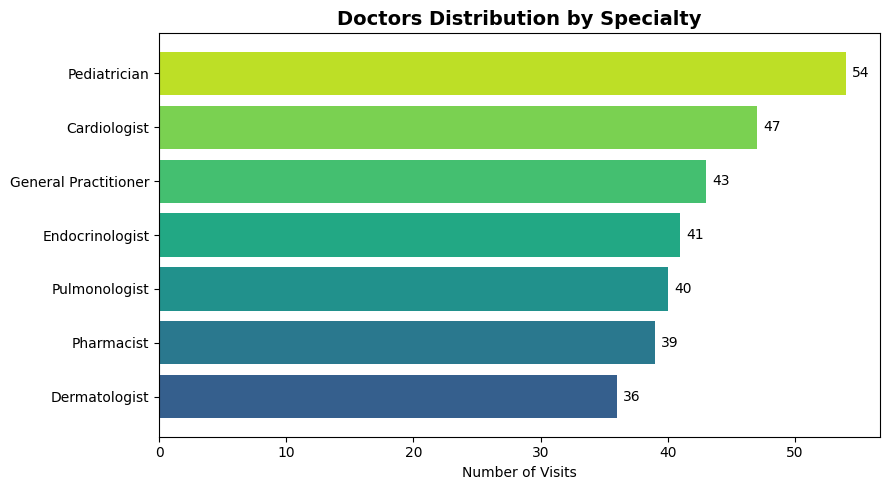

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

specialty_counts = df_crm['doctor_specialty'].value_counts().sort_values()

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(specialty_counts)))

plt.figure(figsize=(9,5))
bars = plt.barh(specialty_counts.index, specialty_counts.values, color=colors)

plt.title("Doctors Distribution by Specialty", fontsize=14, weight='bold')
plt.xlabel("Number of Visits")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

Medical visits are concentrated in a few key specialties, highlighting the primary target segments in the healthcare market.
This distribution helps prioritize audiences and tailor scientific and marketing content more effectively.

**4-DISTRIBUTION GÉOGRAPHIQUE**

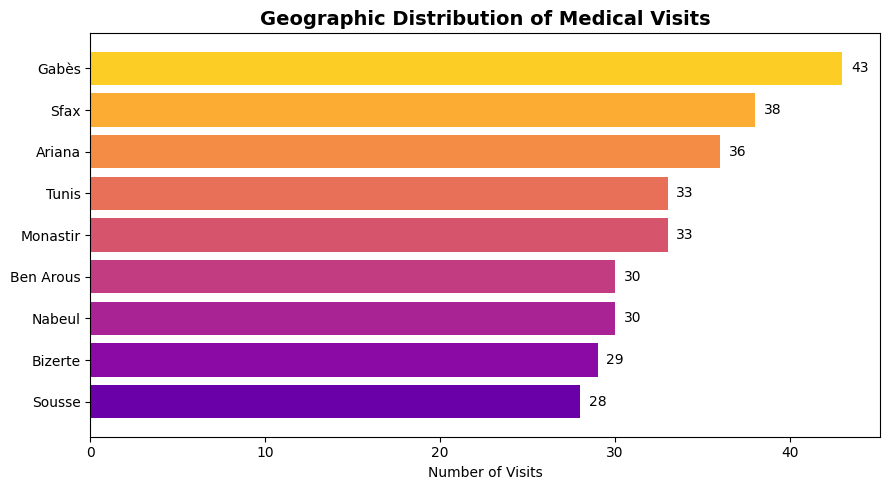

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

region_counts = df_crm['region'].value_counts().sort_values()

colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(region_counts)))

plt.figure(figsize=(9,5))
bars = plt.barh(region_counts.index, region_counts.values, color=colors)

plt.title("Geographic Distribution of Medical Visits", fontsize=14, weight='bold')
plt.xlabel("Number of Visits")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

Medical visits are concentrated in a few key regions, especially Gabès and Sfax, indicating priority markets.
This geographic pattern helps optimize regional targeting and allocate field resources more effectively.

**5-OBJECTIONS PRINCIPALES**

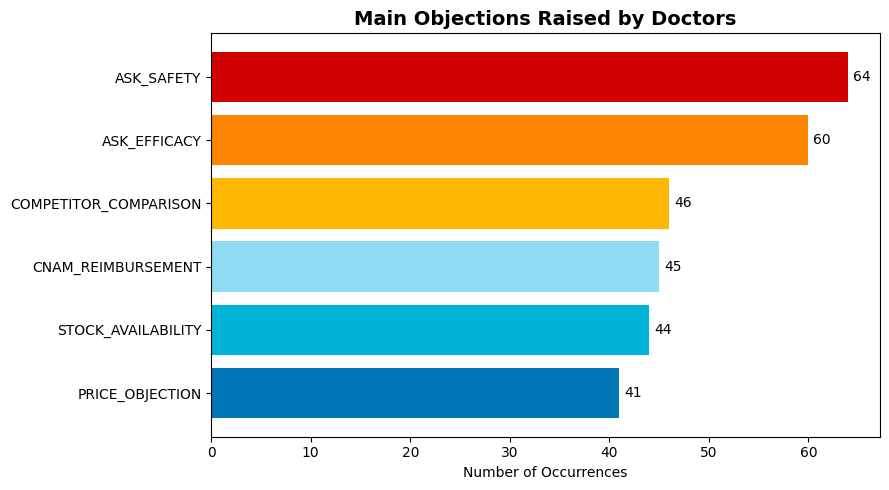

In [ ]:
import matplotlib.pyplot as plt

objection_counts = df_crm['main_objection_type'].value_counts().sort_values()

colors = ['#0077b6', '#00b4d8', '#90dbf4', '#ffb703', '#fb8500', '#d00000']

plt.figure(figsize=(9,5))
bars = plt.barh(objection_counts.index, objection_counts.values, color=colors)

plt.title("Main Objections Raised by Doctors", fontsize=14, weight='bold')
plt.xlabel("Number of Occurrences")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5,
             bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             va='center')

plt.tight_layout()
plt.show()

Doctors mainly raise concerns about product safety and efficacy, highlighting the importance of strong scientific evidence.
Economic and practical factors such as reimbursement, availability, and price also influence adoption decisions.

**6-SENTIMENT & INTEREST ANALYSIS**

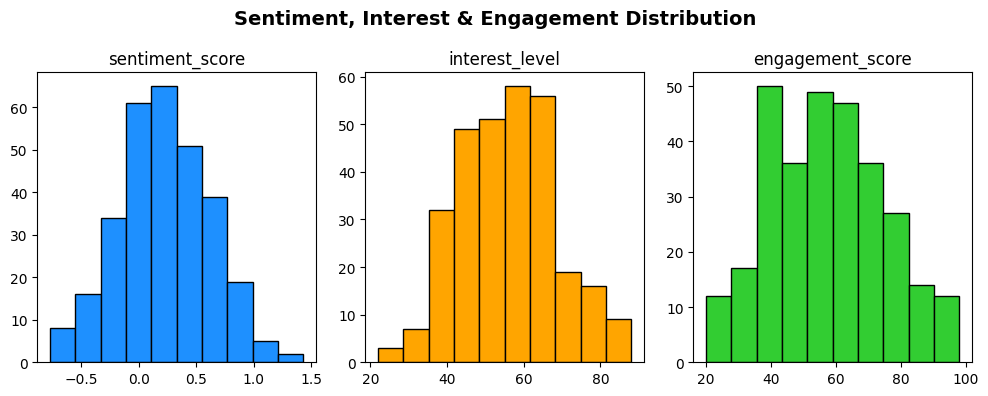

In [ ]:
import matplotlib.pyplot as plt

cols = ['sentiment_score','interest_level','engagement_score']
colors = ['dodgerblue', 'orange', 'limegreen']

plt.figure(figsize=(10,4))

for i, col in enumerate(cols):
    plt.subplot(1,3,i+1)
    plt.hist(df_crm[col], color=colors[i], edgecolor='black')
    plt.title(col)

plt.suptitle("Sentiment, Interest & Engagement Distribution", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

Sentiment scores are mostly positive, indicating that doctors have a favorable perception of the products.

Interest levels are generally moderate to high, showing strong curiosity and potential adoption.

Engagement scores are also relatively high, suggesting that medical visits are effective and capture doctors’ attention.

**7-ANALYSE DES CATÉGORIES PRODUITS**

In [ ]:
df_crm['product_category'].value_counts().head(10)

,count
product_category,
Compléments Alimentaires | Compléments alimentaires enfant,42
Compléments Alimentaires | Santé | Gorge et respiratoire,28
Compléments Alimentaires | Santé | Immunité,11
Compléments Alimentaires | Confort | Anti fatigue,10
Etape de la routine | Soin avec actifs,10
Compléments Alimentaires | Santé | Fer,10
Compléments Alimentaires | Santé | Transit et digestion,9
Compléments Alimentaires | Confort | Anti stress et anxiété,9
Corps | Soins minceur,9


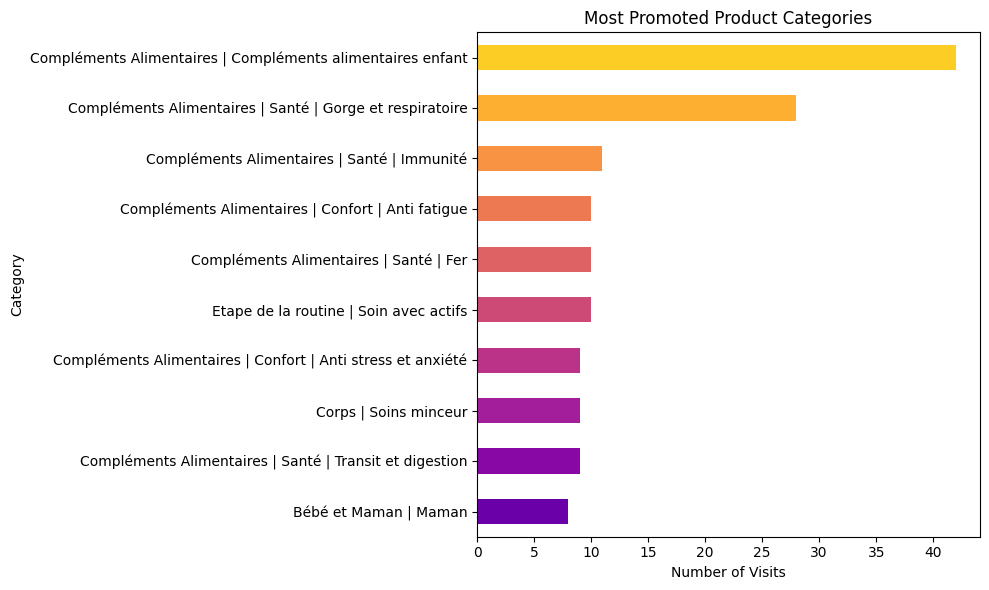

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

top_categories = df_crm['product_category'].value_counts().head(10)

colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(top_categories)))

plt.figure(figsize=(10,6))
top_categories.sort_values().plot(kind='barh', color=colors)

plt.title("Most Promoted Product Categories")
plt.xlabel("Number of Visits")
plt.ylabel("Category")

plt.tight_layout()
plt.show()

Children’s dietary supplements are the most promoted category, highlighting strong demand for pediatric health and nutrition.

Other frequently promoted categories focus on respiratory health, immunity, and wellness, reflecting common preventive healthcare needs.

SEGMENTATION INSIGHTS

 # ***8-segmentation prête pour LLM***

The segmentation combines specialty and region to create clear audience profiles that can be directly used by an LLM for targeted communication.
These structured profiles enable personalized messaging tailored to each medical specialty and geographic context

In [ ]:
# ===== LLM READY SEGMENTATION =====

import numpy as np

# 1️⃣ Segment Interest Level
df_crm['interest_segment'] = pd.cut(
    df_crm['interest_level'],
    bins=[0,40,70,100],
    labels=['low_interest','moderate_interest','high_interest']
)

# 2️⃣ Segment Sentiment
df_crm['sentiment_segment'] = pd.cut(
    df_crm['sentiment_score'],
    bins=[-1, -0.1, 0.1, 1],
    labels=['negative_perception','neutral_perception','positive_perception']
)

# 3️⃣ Define Objection Category (psychological need)
def map_objection(obs):
    if obs in ['PRICE_OBJECTION']:
        return 'price_sensitive'
    elif obs in ['STOCK_AVAILABILITY']:
        return 'availability_concern'
    elif obs in ['CNAM_REIMBURSEMENT']:
        return 'reimbursement_sensitive'
    elif obs in ['ASK_EFFICACY']:
        return 'needs_scientific_proof'
    elif obs in ['ASK_SAFETY']:
        return 'safety_concern'
    else:
        return 'general_information'

df_crm['objection_profile'] = df_crm['main_objection_type'].apply(map_objection)

# 4️⃣ Build LLM Audience Profile
df_crm['audience_profile'] = (
    "Specialty: " + df_crm['doctor_specialty'].astype(str) + ", " +
    "Region: " + df_crm['region'].astype(str) + ", " +
    "Persona: " + df_crm['doctor_persona'].astype(str) + ", " +
    "Interest: " + df_crm['interest_segment'].astype(str) + ", " +
    "Perception: " + df_crm['sentiment_segment'].astype(str) + ", " +
    "Concern: " + df_crm['objection_profile'].astype(str)
)

# 5️⃣ Preview LLM-ready segmentation
df_crm[['doctor_specialty','region','audience_profile']].head()

,doctor_specialty,region,audience_profile
0,Pediatrician,Tunis,"Specialty: Pediatrician, Region: Tunis, Person..."
1,Cardiologist,Monastir,"Specialty: Cardiologist, Region: Monastir, Per..."
2,Pulmonologist,Nabeul,"Specialty: Pulmonologist, Region: Nabeul, Pers..."
3,Pharmacist,Sfax,"Specialty: Pharmacist, Region: Sfax, Persona: ..."
4,Pulmonologist,Ben Arous,"Specialty: Pulmonologist, Region: Ben Arous, P..."


**9-Segmentation par SPECIALITÉ × INTÉRÊT**

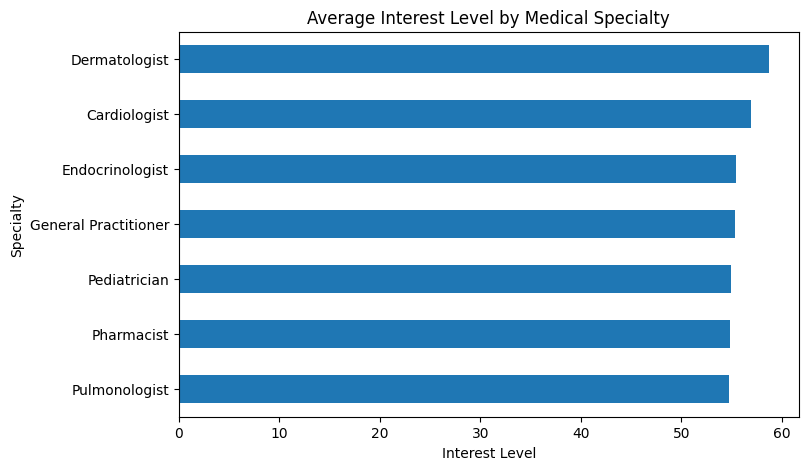

In [ ]:
interest_by_specialty = df_crm.groupby('doctor_specialty')['interest_level'].mean().sort_values()

interest_by_specialty.plot(kind='barh', figsize=(8,5))
plt.title("Average Interest Level by Medical Specialty")
plt.xlabel("Interest Level")
plt.ylabel("Specialty")
plt.show()

Interest levels are consistently high across all medical specialties, indicating strong relevance of the products presented.

Dermatologists and cardiologists show the highest interest, making them priority target segments.

**10 -Engagement par CANAL (Clinic / Hospital / Pharmacy)**

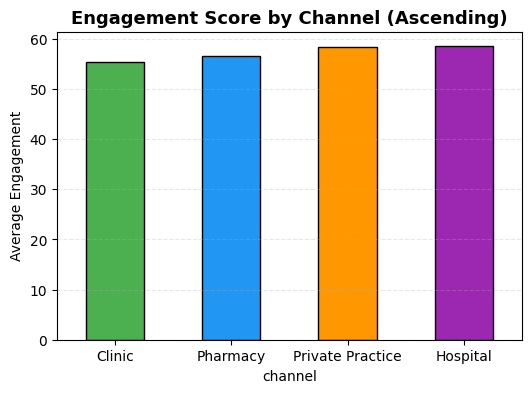

In [ ]:
import matplotlib.pyplot as plt

# Moyenne d'engagement par canal
engagement_channel = df_crm.groupby('channel')['engagement_score'].mean()

# Trier en ordre croissant
engagement_channel = engagement_channel.sort_values(ascending=True)

colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

engagement_channel.plot(
    kind='bar',
    figsize=(6,4),
    color=colors,
    edgecolor='black'
)

plt.title("Engagement Score by Channel (Ascending)", fontsize=13, weight='bold')
plt.ylabel("Average Engagement")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

Engagement levels are relatively similar across all channels, indicating consistent interaction quality regardless of the setting.

Hospitals and private practices show slightly higher engagement, suggesting they may offer stronger opportunities for impactful communication.

**11-Heatmap Région × Engagement**

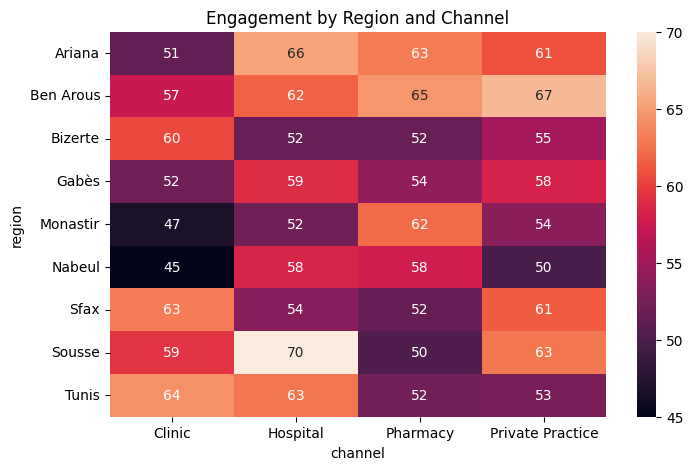

In [ ]:
import seaborn as sns

region_engagement = df_crm.pivot_table(
    values='engagement_score',
    index='region',
    columns='channel',
    aggfunc='mean'
)

plt.figure(figsize=(8,5))
sns.heatmap(region_engagement, annot=True)
plt.title("Engagement by Region and Channel")
plt.show()

Engagement varies by region and channel, with hospitals generally showing the highest engagement levels, especially in Sousse and Ariana.
Clinics perform strongly in Tunis and Sfax, while pharmacy engagement is more moderate, indicating opportunities for improvement in that channel.

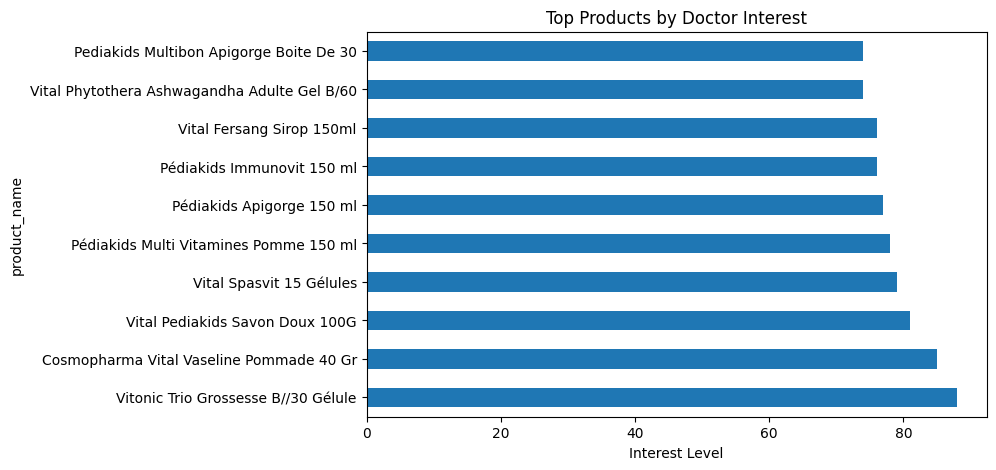

In [ ]:
top_products_interest = df_crm.groupby('product_name')['interest_level'].mean().sort_values(ascending=False).head(10)

top_products_interest.plot(kind='barh', figsize=(8,5))
plt.title("Top Products by Doctor Interest")
plt.xlabel("Interest Level")
plt.show()